<a href="https://colab.research.google.com/github/DinaHM99/Analyzing-UCI-crimes-and-communities/blob/main/UC_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import re
import json
from pandas.io.json import json_normalize

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data',header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [6]:
df = df.rename(columns = {0: 'State', 1: 'Country', 2: 'Community', 3: 'communityName', 4: 'fold', 5: 'population', 6: 'householdSize', 7: 'racepctblack', 8: 'racePctWhite', 9:'racPctAsian',10: 'racePctHisp', 11: 'agePct12t21', 12: 'agePct12t29', 13: 'agePct16t24', 14: 'agePct65up', 15: 'numbUrban', 16: 'pctUrban', 17: 'medIncome', 18: 'pctWWage', 19: 'pctWFarmSelf', 20: 'pctWInvInc', 21: 'pctWSocSec', 22: 'pctWPubAsst', 23: 'pctWRetire', 24: 'medFamInc', 25: 'perCapInc', 26: 'whitePerCap', 27: 'blackPerCap', 28: 'indianPerCap', 29: 'AsianPerCap', 30: 'OtherPerCap', 31: 'HispPerCap', 32: 'NumUnderPov', 33: 'PctPopUnderPov', 34: 'PctLess9thGrade', 35: 'PctNotHSGrad', 36: 'PctBSorMore', 37: 'PctUnemployed', 38: 'PctEmploy', 39: 'PctEmplManu', 40: 'PctEmplProfServ', 41: 'PctOccupManu', 42: 'PctOccupMgmtProf', 43: 'MalePctDivorce', 44: 'MalePctNevMarr', 45: 'FemalePctDiv', 46: 'TotalPctDiv', 47: 'PersPerFam', 48: 'PctFam2Par', 49: 'PctKids2Par', 50: 'PctYoungKids2Par', 51: 'PctTeen2Par', 52: 'PctWorkMomYoungKids', 53: 'PctWorkMom', 54: 'NumKidsBornNeverMar', 55: 'PctKidsBornNeverMar', 56: 'NumImmig', 57: 'PctImmigRecent', 58: 'PctImmigRec5', 59: 'PctImmigRec8', 60: 'PctImmigRec10', 61: 'PctRecentImmig', 62: 'PctRecImmig5', 63: 'PctRecImmig8', 64: 'PctRecImmig10', 65: 'PctSpeakEnglOnly', 66: 'PctNotSpeakEnglWell', 67: 'PctLargHouseFam', 68: 'PctLargHouseOccup', 69: 'PersPerOccupHous', 70: 'PersPerOwnOccHous', 71: 'PersPerRentOccHous', 72: 'PctPersOwnOccup', 73: 'PctPersDenseHous', 74: 'PctHousLess3BR', 75: 'MedNumBR', 76: 'HousVacant', 77: 'PctHousOccup', 78: 'PctHousOwnOcc', 79: 'PctVacantBoarded', 80: 'PctVacMore6Mos', 81: 'MedYrHousBuilt', 82: 'PctHousNoPhone', 83: 'PctWOFullPlumb', 84: 'OwnOccLowQuart', 85: 'OwnOccMedVal', 86: 'OwnOccHiQuart', 87: 'OwnOccQrange', 88: 'RentLowQ', 89: 'RentMedian', 90: 'RentHighQ', 91: 'RentQrange', 92: 'MedRent', 93: 'MedRentPctHousInc', 94: 'MedOwnCostPctInc', 95: 'MedOwnCostPctIncNoMtg', 96: 'NumInShelters', 97: 'NumStreet', 98: 'PctForeignBorn', 99: 'PctBornSameState', 100: 'PctSameHouse85', 101: 'PctSameCity85', 102: 'PctSameState85', 103: 'LemasSwornFT', 104: 'LemasSwFTPerPop', 105: 'LemasSwFTFieldOps', 106: 'LemasSwFTFieldPerPop', 107: 'LemasTotalReq', 108: 'LemasTotReqPerPop', 109: 'PolicReqPerOffic', 110: 'PolicPerPop', 111: 'RacialMatchCommPol', 112: 'PctPolicWhite', 113: 'PctPolicBlack', 114: 'PctPolicHisp', 115: 'PctPolicAsian', 116: 'PctPolicMinor', 117: 'OfficAssgnDrugUnits', 118: 'NumKindsDrugsSeiz', 119: 'PolicAveOTWorked', 120: 'LandArea', 121: 'PopDens', 122: 'PctUsePubTrans', 123: 'PolicCars', 124: 'PolicOperBudg', 125: 'LemasPctPolicOnPatr', 126:'LemasGangUnitDeploy', 127: 'ViolentCrimesPerPop'}, inplace = False)

In [7]:
print(df)

      State Country Community        communityName  fold  population  \
0         8       ?         ?         Lakewoodcity     1        0.19   
1        53       ?         ?          Tukwilacity     1        0.00   
2        24       ?         ?         Aberdeentown     1        0.00   
3        34       5     81440  Willingborotownship     1        0.04   
4        42      95      6096    Bethlehemtownship     1        0.01   
...     ...     ...       ...                  ...   ...         ...   
1989     12       ?         ?    TempleTerracecity    10        0.01   
1990      6       ?         ?          Seasidecity    10        0.05   
1991      9       9     80070        Waterburytown    10        0.16   
1992     25      17     72600          Walthamcity    10        0.08   
1993      6       ?         ?          Ontariocity    10        0.20   

      householdSize  racepctblack  racePctWhite  racPctAsian  ...  \
0              0.33          0.02          0.90         0.12  ... 

In [8]:
df.head()

,State,Country,Community,communityName,fold,population,householdSize,racepctblack,racePctWhite,racPctAsian,...,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [9]:
df.columns

Index(['State', 'Country', 'Community', 'communityName', 'fold', 'population',
       'householdSize', 'racepctblack', 'racePctWhite', 'racPctAsian',
       ...
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens',
       'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

In [10]:
my_list = list(df)

In [11]:
print(my_list)

['State', 'Country', 'Community', 'communityName', 'fold', 'population', 'householdSize', 'racepctblack', 'racePctWhite', 'racPctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImm

In [12]:
print(df['ViolentCrimesPerPop'].min(),
      df['ViolentCrimesPerPop'].max(),
      df['ViolentCrimesPerPop'].mean(),
      df['ViolentCrimesPerPop'].std(),
      df['ViolentCrimesPerPop'].median())

0.0 1.0 0.23797893681043028 0.2329849017279638 0.15


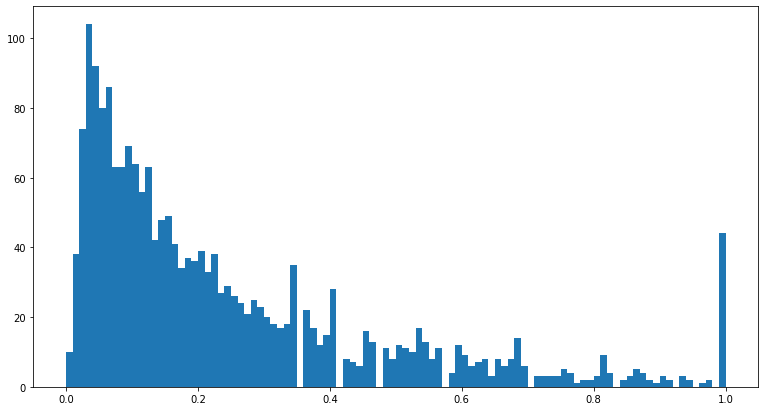

In [13]:
plt.figure(figsize=(13,7))
plt.hist(df['ViolentCrimesPerPop'].fillna(-1), bins=100)
plt.show()

In [12]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 8.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 45.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 5.0 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516313 sha256=1b4f74a594ca2be1887299b38211a34eb5b52df56844ee3ef4d843fcea6c58c8
  Stored in directory: /root/.cache/pip/whee

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip

Geometry must be a Point or LineString


In [1]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


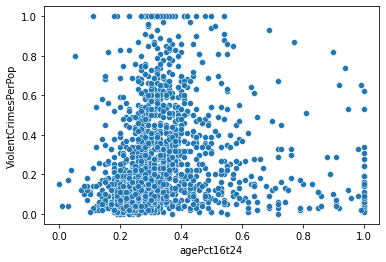

In [14]:
ax = sns.scatterplot(x = "agePct16t24", y = "ViolentCrimesPerPop", data=df)
plt.show()

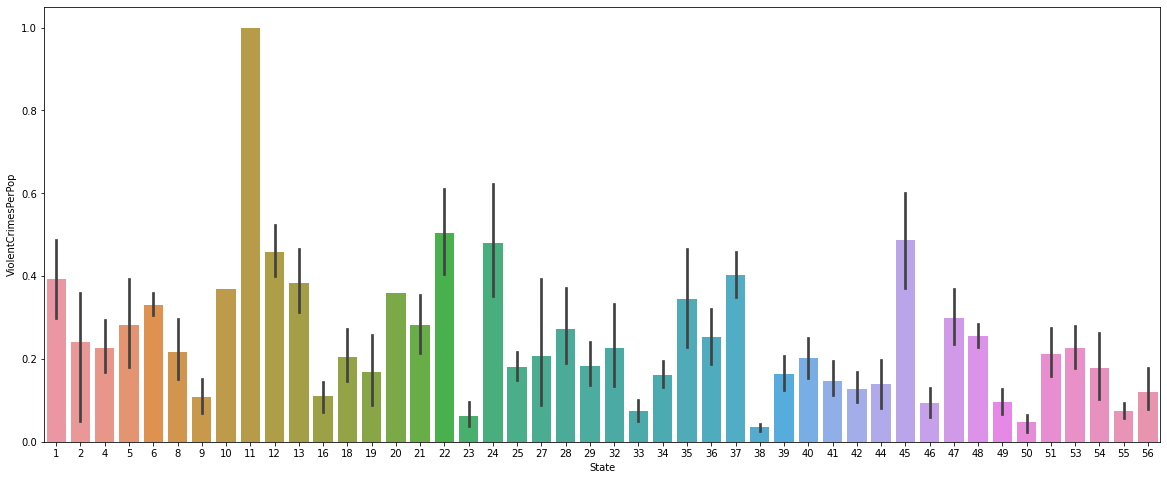

In [15]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="State" , y="ViolentCrimesPerPop", data=df)
plt.show()

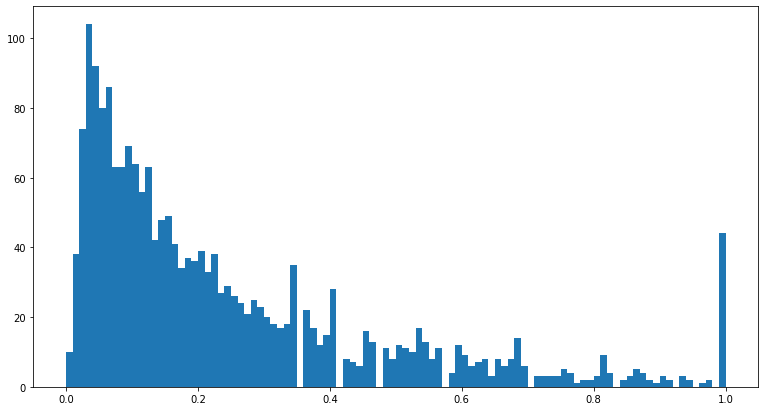

In [16]:
plt.figure(figsize=(13,7))
plt.hist(df['ViolentCrimesPerPop'].fillna(-1), bins=100)
plt.show()

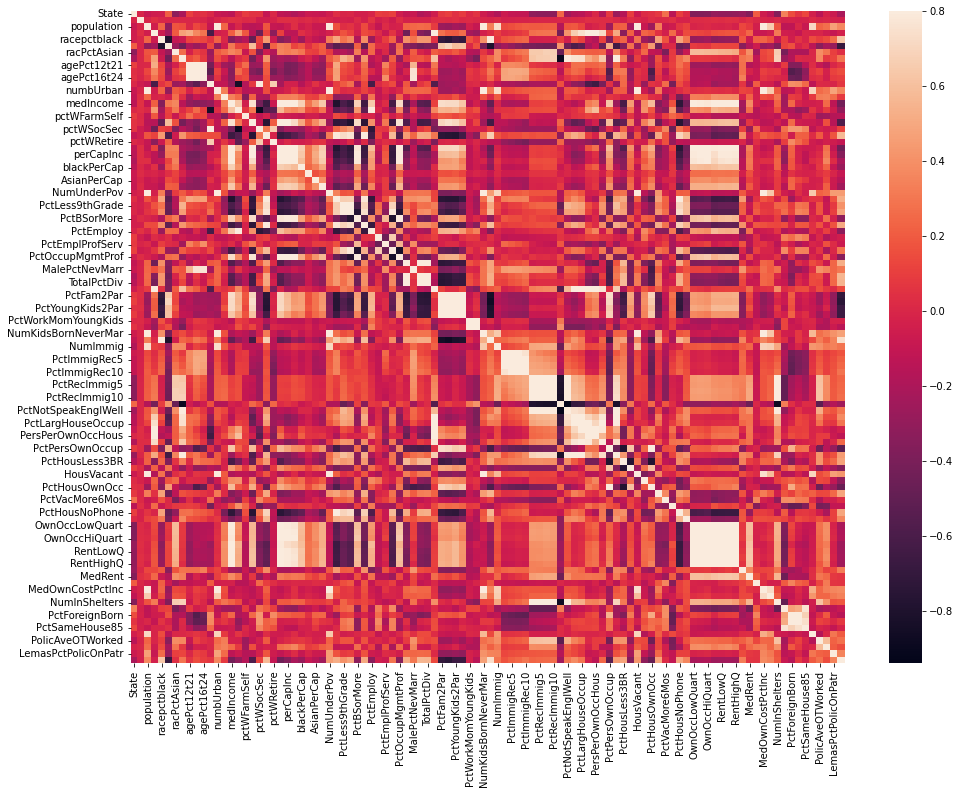

In [17]:
import seaborn as sns

corrmat = df.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [20]:
corrT = df.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par           -0.7384
PctFam2Par            -0.7067
racePctWhite          -0.6848
PctYoungKids2Par      -0.6661
PctTeen2Par           -0.6616
                        ...  
FemalePctDiv           0.5560
pctWPubAsst            0.5747
racepctblack           0.6313
PctKidsBornNeverMar    0.7380
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, Length: 102, dtype: float64

In [22]:
X = df.iloc[:, 0:100].values
y = df.iloc[:, 100].values

from sklearn.model_selection import train_test_split

seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


In [23]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored